In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

# convert csv file to a list of dictionary, Return a list of dictionaries, where each row in the dataset is a dictionary with the column headers as keys and the row elements as values.
def load_data(filepath):
    data = list()
    with open(filepath, 'r') as f:
        # read in the header
        header = f.readline().strip().split(',')
        for line in f:
            line = line.strip().split(',')
            data.append({header[i] : line[i] for i in range(len(header))})

    return data

In [2]:
def calc_features(row):
    # construct a numpy array of the features for one data entry, reshape to (6,)
    return np.array([float(row['Population']), float(row['Net migration']), float(row['GDP ($ per capita)']), float(row['Literacy (%)']), float(row['Phones (per 1000)']), float(row['Infant mortality (per 1000 births)']) ], dtype = np.float64).reshape(6,)

In [3]:
# The input to this function will be a list of the feature vectors output from calc_features
# It should return a list of numpy arrays, each of which is a 6x1 column vector corresponding to one data point
def normalize_features(features):
    # deep copy the features, or else the input features will be changed
    features_copy = features.copy()

    # columns mean
    columns_mean = np.mean(features_copy, axis = 0)
    # columns std
    columns_std = np.std(features_copy, axis = 0)
    
    return [(array - columns_mean) / columns_std for array in features_copy]

In [4]:
# complete-linkage hierarchical clustering
def hac(features):
    # construct a distance matrix
    distance_matrix = np.zeros((len(features), len(features)), dtype = np.float64)
    for i in range(len(features)):
        for j in range(len(features)):
            # calculate the Euclidean distance between two data points
            distance_matrix[i][j] = np.sqrt(np.sum((features[i] - features[j]) ** 2))

    # generate a list of lists, each list represents a cluster, the first element of the list is the cluster number including the merged clusters (n + row), the rest of the elements are the individual data points in the cluster
    clusters_list = [[i, i] for i in range(len(features))]

    # construct (n − 1) × 4 array
    clustering = np.zeros((len(features) - 1, 4))

    for row_index in range(len(features) - 1):
        # determine which two clusters are the closest, put their numbers into the first and second elements of the row

        # found minimum distance between two clusters
        min_distance = 0
        # smaller index of the two clusters with minimum distance
        merge_cluster_index_min = 0
        # larger index of the two clusters with minimum distance
        merge_cluster_index_max = 0

        # calculate the complete-linkage distance between two clusters
        for i in range(len(clusters_list)):
            for j in range(i + 1, len(clusters_list)):
                # define maximum distance between any two points each within the two clusters
                max_distance = 0

                # calculate the maximum distance between any two points
                for value1 in clusters_list[i][1:]:
                    for value2 in clusters_list[j][1:]:
                        if distance_matrix[value1][value2] > max_distance or max_distance == 0:
                            max_distance = distance_matrix[value1][value2]
                
                # update the merged clusters index
                if min_distance == 0 or max_distance < min_distance:
                    min_distance = max_distance
                    merge_cluster_index_min = min(i, j)
                    merge_cluster_index_max = max(i, j)
                # tie-breaking when two pairs of clusters have the same distance, pick the pair with the smallest first index, if tie again, pick the pair with the smallest second index
                elif max_distance == min_distance:
                    if min(i, j) < merge_cluster_index_min:
                        merge_cluster_index_min = min(i, j)
                        merge_cluster_index_max = max(i, j)
                    elif min(i, j) == merge_cluster_index_min:
                        if max(i, j) < merge_cluster_index_max:
                            merge_cluster_index_min = min(i, j)
                            merge_cluster_index_max = max(i, j)

        # update clustering matrix
        clustering[row_index][0] = clusters_list[merge_cluster_index_min][0]
        clustering[row_index][1] = clusters_list[merge_cluster_index_max][0]
        clustering[row_index][2] = min_distance
        clustering[row_index][3] = len(clusters_list[merge_cluster_index_min]) + len(clusters_list[merge_cluster_index_max]) - 2

        # merge the two clusters in the clusters_list
        # pop the first element of each cluster
        clusters_list[merge_cluster_index_min].pop(0)
        clusters_list[merge_cluster_index_max].pop(0)
        # append the second cluster to the first cluster
        new_list = clusters_list[merge_cluster_index_min] + clusters_list[merge_cluster_index_max]
        new_list.insert(0, len(features) + row_index)
        # insert the new index number as the first element of the new cluster
        clusters_list.append(new_list)
        # pop the two old clusters, had to pop the larger index first, or else the smaller index will change
        clusters_list.pop(merge_cluster_index_max)
        clusters_list.pop(merge_cluster_index_min)
        
    return clustering

In [5]:
def fig_hac(Z, names):
    # plot the dendrogram
    fig = plt.figure()
    scipy.cluster.hierarchy.dendrogram(Z, labels = names, leaf_rotation= 90)
    # call tight_layout to make the plot look nicer
    plt.tight_layout()

    return fig

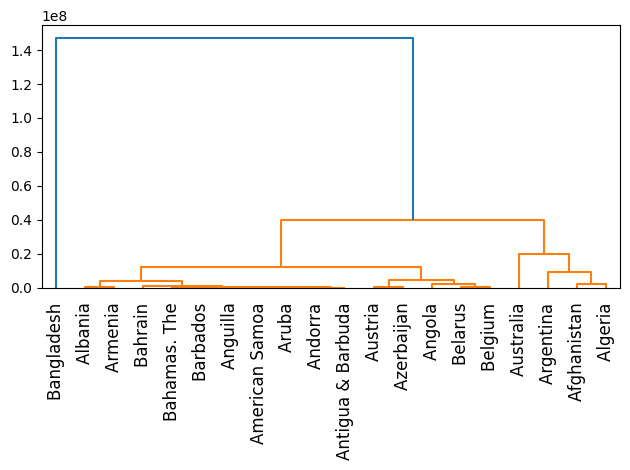

In [6]:
data = load_data('countries.csv')
country_names = [row['Country'] for row in data]
features = [calc_features(row) for row in data]
features_normalized = normalize_features(features)
n = 20
Z_raw = hac(features[:n])
Z_normalized = hac(features_normalized[:n])
fig = fig_hac(Z_raw, country_names[:n])
plt.show()

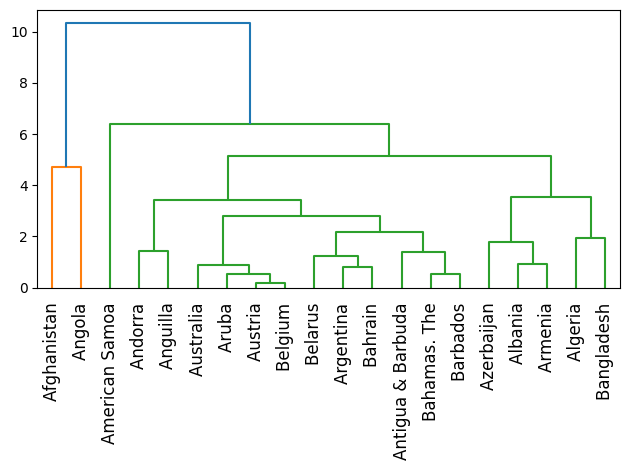

In [7]:
fig = fig_hac(Z_normalized, country_names[:n])
plt.show()

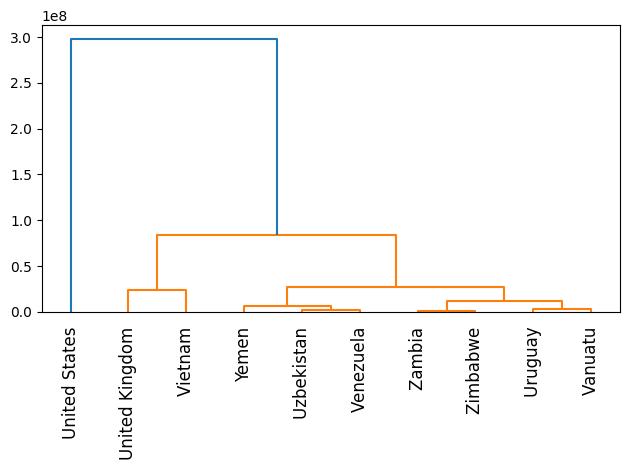

In [8]:
n = 10
Z_raw = hac(features[-n:])
Z_normalized = hac(features_normalized[-n:])
fig = fig_hac(Z_raw, country_names[-n:])
plt.show()

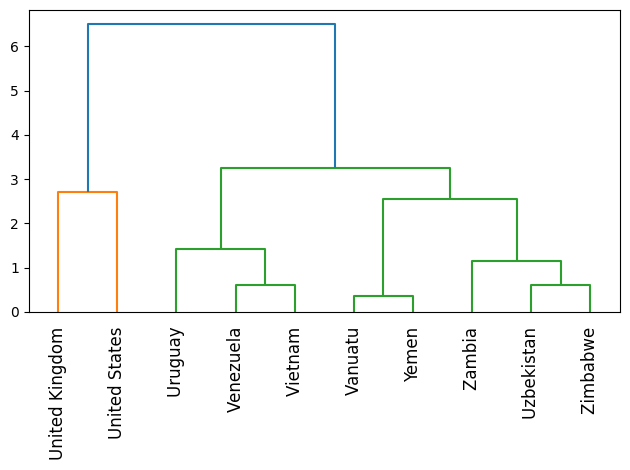

In [9]:
fig = fig_hac(Z_normalized, country_names[-n:])
plt.show()

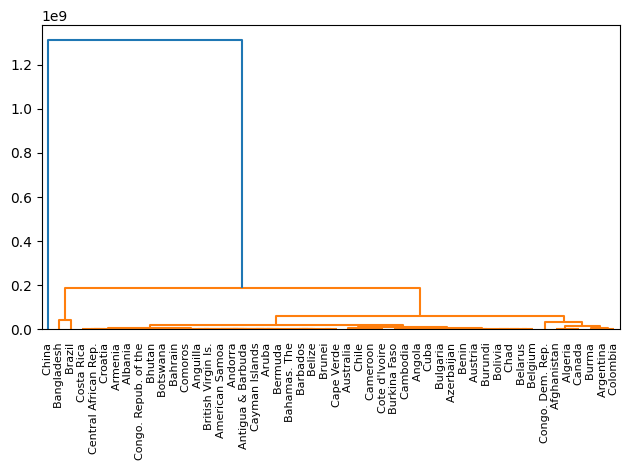

In [10]:
data = load_data('countries.csv')
country_names = [row['Country'] for row in data]
features = [calc_features(row) for row in data]
features_normalized = normalize_features(features)
n = 50
Z_raw = hac(features[:n])
Z_normalized = hac(features_normalized[:n])
fig = fig_hac(Z_raw, country_names[:n])
plt.show()